In [17]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
import matplotlib.pyplot as plt
# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target
# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

plt.figure()
iris_df.hist()
plt.suptitle("Before scaling")
pd.DataFrame(X_train_std, columns=iris_df.columns).hist()
plt.suptitle("After scaling")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7004/2761528205.py", line 25, in <module>
    iris_df.hist()
  File "/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/pandas/plotting/_core.py", line 230, in hist_frame
    ylabelsize=ylabelsize,
  File "/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1886, in _get_plot_backend
  File "/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1817, in _load_backend
    # Fall back to unregistered, module name approach.
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most 

<Figure size 640x480 with 0 Axes>

In [1]:

import numpy as np
from sklearn.model_selection import train_test_split
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target

X = X[:,:2] # Use only the first 2 columns. This is for easy plotting/visualisation
x, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(80, 2)
(80,)
(20, 2)
(20,)


SVM Training Accuracy: 0.7125


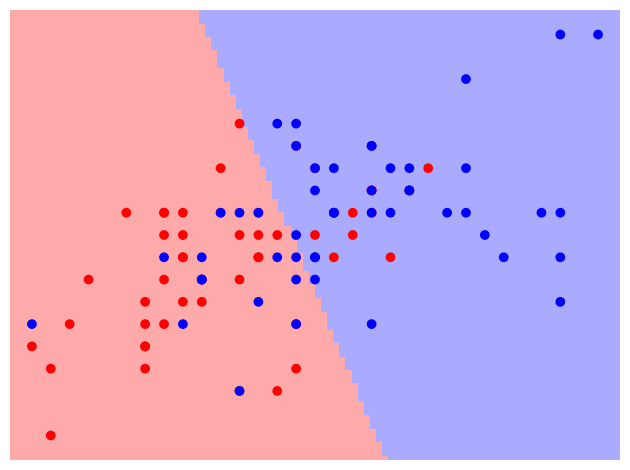

In [2]:
# Fit SVM using linear kernel on training data
from matplotlib.colors import ListedColormap

# We define a colormap with three colors, for three labels our data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator),
    '''
    print()
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
# Fit SVM using linear kernel on training data
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
svc_model = svm.SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

#Training/Testing Accuracy:
svc_acc = metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))
print("SVM Training Accuracy: {}".format(svc_acc))
plot_estimator(svc_model,x,y)

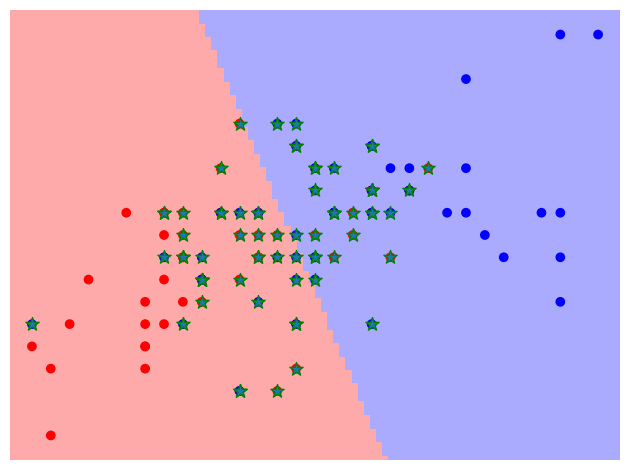

In [5]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.show()

In [6]:
#Testing Accuracy:
svc_acc_test = metrics.accuracy_score(ytest, svc_model.predict(Xtest))
print("SVM Testing Accuracy: {}".format(svc_acc_test))

SVM Testing Accuracy: 0.7



Data has a total of 55 support vectors
Training accuracy: 0.725
Testing accuracy : 0.7


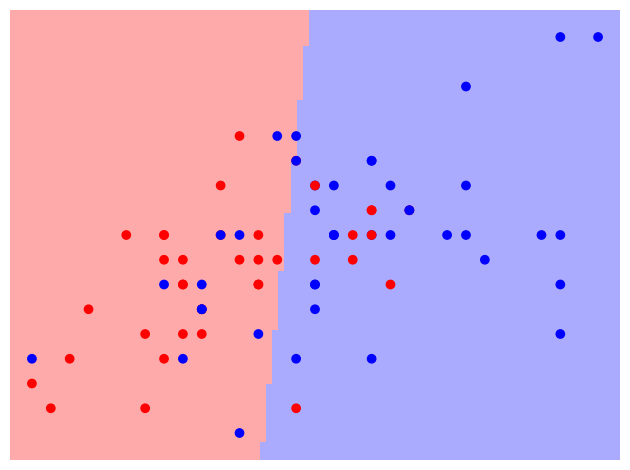

In [7]:
svc_model = svm.SVC(kernel='linear', C=1e2)
svc_model.fit(Xtrain, ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

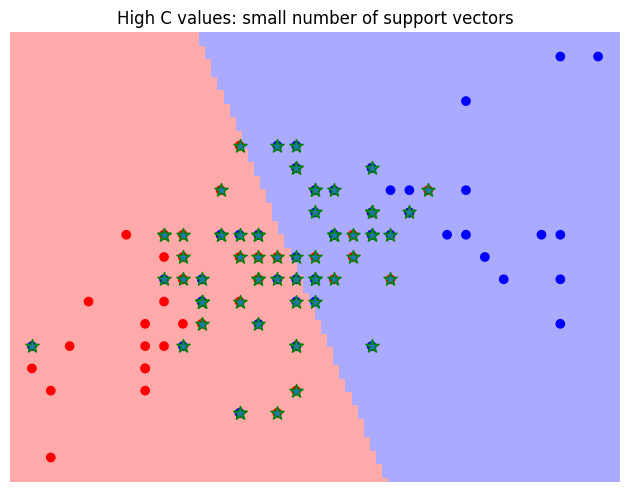

In [8]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('High C values: small number of support vectors')
plt.show()

Data has a total of 76 support vectors

Training accuracy: 0.7
Testing accuracy : 0.65


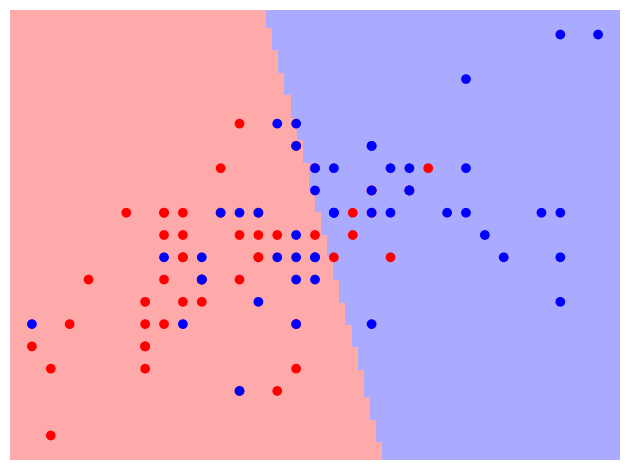

In [9]:
svc_model = svm.SVC(kernel='linear', C=1e-2)

svc_model.fit(Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

plot_estimator(svc_model, x, y)

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

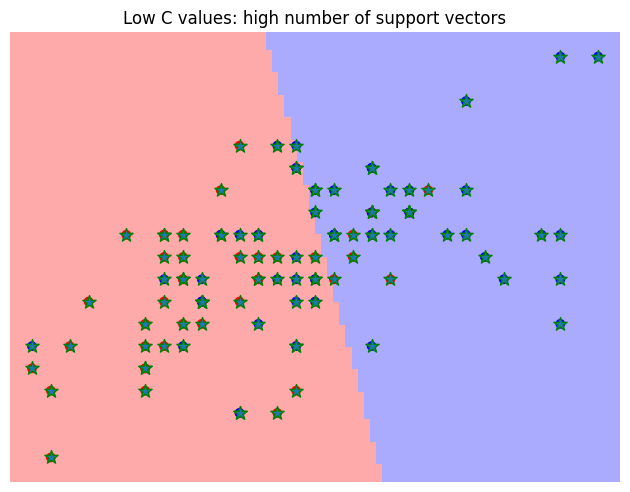

In [10]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('Low C values: high number of support vectors')
plt.show()

/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/marsson/anaconda3/envs/Ai_universityClass/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


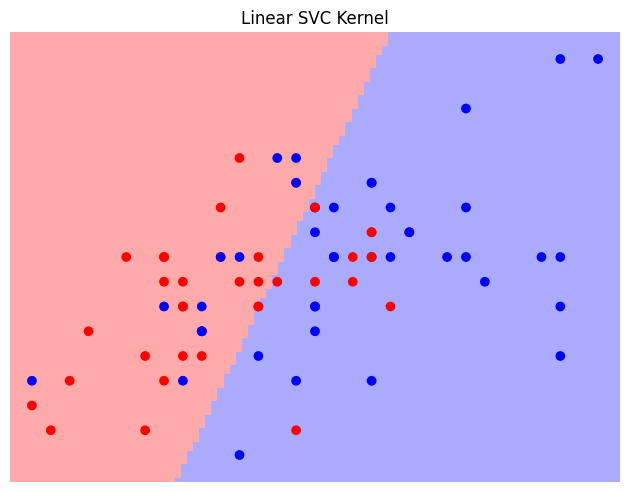

In [12]:
svc_model = svm.LinearSVC()
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Linear SVC Kernel')
plt.show()


Training accuracy: 0.725
Testing accuracy : 0.7


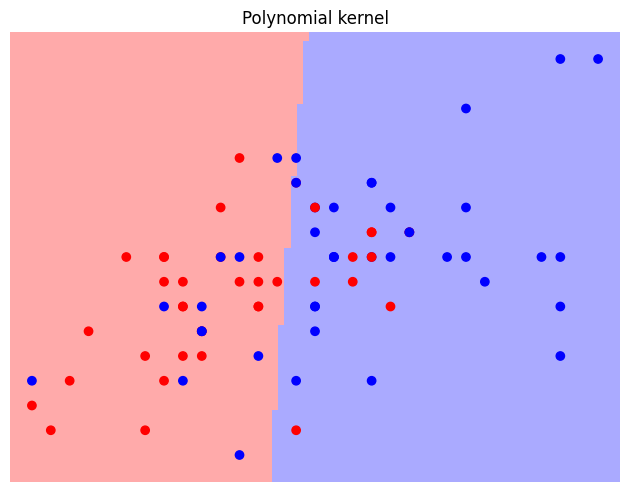

In [13]:
svc_model = svm.SVC(kernel='poly', degree=2)

svc_model.fit(Xtrain,ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Polynomial kernel')

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

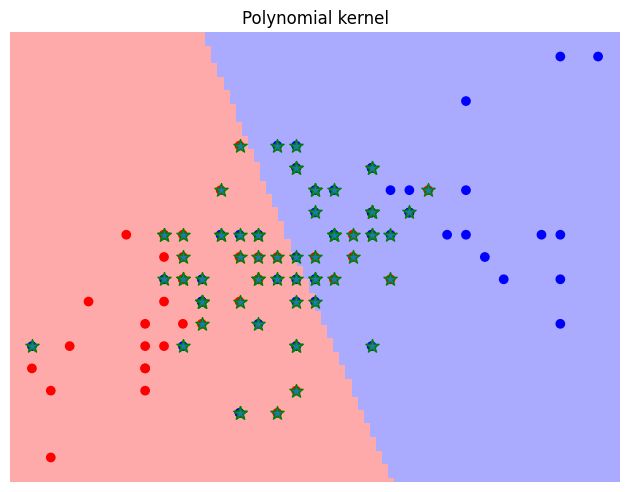

In [14]:
#plotting support vectors
plot_estimator(svc_model, x, y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], marker='*', s=100, edgecolors='g', zorder=10)
plt.title('Polynomial kernel')
plt.show()